In [0]:
# Import Packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import re
from google.colab import files

In [0]:
# Code to read csv file into Colaboratory:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [0]:
link = 'https://drive.google.com/open?id=1hN3YhlO_8VrPAYhWsOn5-vG7YLSmVdVz' # The shareable link' # The shareable link

fluff, id = link.split('=')
# print (id) # Verify that you have everything after '='

In [0]:
downloaded = drive.CreateFile({'id':id}) 
downloaded.GetContentFile('Raw Data_4.21_20000_Rows.csv')  
df = pd.read_csv('Raw Data_4.21_20000_Rows.csv')
# Dataset is now stored in a Pandas Dataframe

In [0]:
# Filter data to pull the first collumn of data
all_text = df.iloc[:,0]

# Filter data to ensure it has the appropiate health report sections
test_text= all_text[all_text.str.contains('Admission Date:')]
test_text= all_text[all_text.str.contains('Discharge Date:')]
test_text= all_text[all_text.str.contains('Date of Birth:')]
test_text= all_text[all_text.str.contains('Sex:')]
test_text= all_text[all_text.str.contains('Service:')]
test_text= all_text[all_text.str.contains('Allergies:')]
test_text= all_text[all_text.str.contains('Chief Complaint:')]
test_text= all_text[all_text.str.contains('Major Surgical or Invasive Procedure:')]
test_text= all_text[all_text.str.contains('History of Present Illness:')]
test_text= all_text[all_text.str.contains('Past Medical History:')]
test_text= all_text[all_text.str.contains('Social History:')]
test_text= all_text[all_text.str.contains('Family History:')]
test_text= all_text[all_text.str.contains('Physical Exam:')]
test_text= all_text[all_text.str.contains('Pertinent Results:')]
test_text= all_text[all_text.str.contains('Brief Hospital Course:')]
test_text= all_text[all_text.str.contains('Medications on Admission:')]
test_text= all_text[all_text.str.contains('Discharge Medications:')]
test_text= all_text[all_text.str.contains('Discharge Disposition:')]
test_text= all_text[all_text.str.contains('Discharge Diagnosis:')]
test_text= all_text[all_text.str.contains('Discharge Condition:')]
test_text= all_text[all_text.str.contains('Discharge Instructions:')]
test_text= all_text[all_text.str.contains('Followup Instructions:')]

test_text.head()

3    Admission Date:  [**2124-7-21**]              ...
4    Admission Date:  [**2162-3-3**]              D...
5    Admission Date:  [**2172-3-5**]              D...
6    Admission Date:  [**2112-12-8**]              ...
7    Admission Date:  [**2150-2-25**]              ...
Name: TEXT, dtype: object

In [0]:
test_text.count()

10549

In [0]:
# Remove line breaks
test_text_final = []

for x in range(len(test_text)):
  test_text_final.append(test_text.iloc[x].replace('\n', ' '))

In [0]:
# Brief Hospital Course
gpt_text = []
for x in range(len(test_text_final)):
  gpt_text.append(re.findall(r'Brief Hospital Course: (.+) Medications on Admission:', test_text_final[x], re.DOTALL))
gpt_text = [x for x in gpt_text if x]
gpt_text = [item[0] for item in gpt_text]
#gpt_text

In [0]:
# History of Present Illness
gpt_text_2 = []
for x in range(len(test_text_final)):
  gpt_text_2.append(re.findall(r'History of Present Illness: (.+) Past Medical History:', test_text_final[x], re.DOTALL))
gpt_text_2 = [x for x in gpt_text_2 if x]
gpt_text_2 = [item[0] for item in gpt_text_2]
#gpt_text_2

In [0]:
# Past Medical History
gpt_text_3 = []
for x in range(len(test_text_final)):
  gpt_text_3.append(re.findall(r'Past Medical History: (.+) Social History:', test_text_final[x], re.DOTALL))
gpt_text_3 = [x for x in gpt_text_3 if x]
gpt_text_3 = [item[0] for item in gpt_text_3]
#gpt_text_3

In [0]:
# Social History
gpt_text_4 = []
for x in range(len(test_text_final)):
  gpt_text_4.append(re.findall(r'Social History: (.+) Family History:', test_text_final[x], re.DOTALL))
gpt_text_4 = [x for x in gpt_text_4 if x]
gpt_text_4 = [item[0] for item in gpt_text_4]
#gpt_text_4

In [0]:
# Family History
gpt_text_5 = []
for x in range(len(test_text_final)):
  gpt_text_5.append(re.findall(r'Family History: (.+) Physical Exam:', test_text_final[x], re.DOTALL))
gpt_text_5 = [x for x in gpt_text_5 if x]
gpt_text_5 = [item[0] for item in gpt_text_5]
#gpt_text_5

In [0]:
# Service
gpt_text_6 = []
for x in range(len(gpt_text)):
  gpt_text_6.append(re.findall(r'Service: (.+) Allergies:', test_text_final[x], re.DOTALL))
gpt_text_6 = [x for x in gpt_text_6 if x]
gpt_text_6 = [item[0] for item in gpt_text_6]
gpt_text_6 = [x.split()[0] for x in gpt_text_6]
#gpt_text_6

In [0]:
# Chief Complaint
gpt_text_7 = []
for x in range(len(gpt_text)):
  gpt_text_7.append(re.findall(r'Chief Complaint: (.+) Major Surgical or Invasive Procedure:', test_text_final[x], re.DOTALL))
gpt_text_7 = [x for x in gpt_text_7 if x]
gpt_text_7 = [item[0] for item in gpt_text_7]
#gpt_text_7

In [0]:
Brief_Hospital_Course = pd.DataFrame(gpt_text, columns=['Brief Hospital Course'])
# Brief_Hospital_Course

History_Present_Illness = pd.DataFrame(gpt_text_2, columns=['History of Present Illness'])
# History_Present_Illness

Past_Medical_History = pd.DataFrame(gpt_text_3, columns=['Past Medical History'])
# Past_Medical_History

Social_History = pd.DataFrame(gpt_text_4, columns=['Social History'])
# Social History

Family_History = pd.DataFrame(gpt_text_5, columns=['Family History'])
# Family History

Service = pd.DataFrame(gpt_text_6, columns=['Service'])
# Service

Chief_Complaint = pd.DataFrame(gpt_text_7, columns=['Chief Complaint'])
# Chief_Complaint

In [0]:
Brief_Hospital_Course.to_csv('Cleaned_Data_Brief_Hospital_Course_4.21.csv') 
files.download('Cleaned_Data_Brief_Hospital_Course_4.21.csv')

In [0]:
# len(gpt_text)
# 10259

# len(gpt_text_6)
# 10259

# len(gpt_text_7)
# 10259

In [0]:
column_names = ["Service", "Brief Hospital Course"]
Service_Brief_Hospital_Course = pd.DataFrame(columns = column_names)
Service_Brief_Hospital_Course ["Service"] = gpt_text_6
Service_Brief_Hospital_Course ["Brief Hospital Course"] = gpt_text

Service_Brief_Hospital_Course = Service_Brief_Hospital_Course[Service_Brief_Hospital_Course['Service']!='[**Doctor First Name 147**]']
Service_Brief_Hospital_Course = Service_Brief_Hospital_Course[Service_Brief_Hospital_Course['Service']!='[**Hospital Unit Name 196**]']
Service_Brief_Hospital_Course = Service_Brief_Hospital_Course[Service_Brief_Hospital_Course['Service']!='[**Last Name (un) **]']
Service_Brief_Hospital_Course = Service_Brief_Hospital_Course[Service_Brief_Hospital_Course['Service']!='[**Month/Day/Year 662**]']
Service_Brief_Hospital_Course = Service_Brief_Hospital_Course[Service_Brief_Hospital_Course['Service']!='[**Year (4 digits) **]']
Service_Brief_Hospital_Course = Service_Brief_Hospital_Course[Service_Brief_Hospital_Course['Service']!='[**Last Name (un) **]']
Service_Brief_Hospital_Course = Service_Brief_Hospital_Course[Service_Brief_Hospital_Course['Service']!='[**Year (4 digits) 662**]']
Service_Brief_Hospital_Course = Service_Brief_Hospital_Course[Service_Brief_Hospital_Course['Service']!='[**Year (4 digits) 662**]']
Service_Brief_Hospital_Course = Service_Brief_Hospital_Course[Service_Brief_Hospital_Course['Service']!='[**Doctor']
Service_Brief_Hospital_Course = Service_Brief_Hospital_Course[Service_Brief_Hospital_Course['Service']!='[**Hospital']
Service_Brief_Hospital_Course = Service_Brief_Hospital_Course[Service_Brief_Hospital_Course['Service']!='[**Last']
Service_Brief_Hospital_Course = Service_Brief_Hospital_Course[Service_Brief_Hospital_Course['Service']!='[**Month/Day/Year']
Service_Brief_Hospital_Course = Service_Brief_Hospital_Course[Service_Brief_Hospital_Course['Service']!='[**Year']
Service_Brief_Hospital_Course = Service_Brief_Hospital_Course[Service_Brief_Hospital_Course['Service']!='[**Year/Month/Day']

Service_Brief_Hospital_Course.head()


,Service,Brief Hospital Course
0,MEDICINE,"87 yo F with h/o CHF, COPD on 5 L oxygen at ba..."
1,MEDICINE,Mr. [**Known lastname 1829**] was seen at [**H...
2,NEUROSURGERY,Patient presented electively for meningioma re...
3,MEDICINE,"82 yo F with CAD, CHF, HTN, recent PE ([**10-1..."
4,NEUROSURGERY,Patient presented electively on [**2-25**] for...


In [0]:
Service_Brief_Hospital_Course.to_csv('Service_Brief_Hospital_Course_4.30.csv') 
files.download('Service_Brief_Hospital_Course_4.30.csv')

In [0]:
Counts = Service_Brief_Hospital_Course['Service'].value_counts()
Counts

MEDICINE                 6181
CARDIOTHORACIC           1359
SURGERY                  1274
NEUROLOGY                 430
NEUROSURGERY              368
MED                       139
ORTHOPAEDICS              137
OBSTETRICS/GYNECOLOGY      49
UROLOGY                    48
PLASTIC                    29
OTOLARYNGOLOGY             24
EMERGENCY                  23
CSURG                      16
NMED                       16
OMED                       12
VSURG                      10
PSYCHIATRY                  6
TSURG                       4
PODIATRY                    3
GYN                         2
RADIOLOGY                   2
GU                          2
PSURG                       1
DENT                        1
Name: Service, dtype: int64

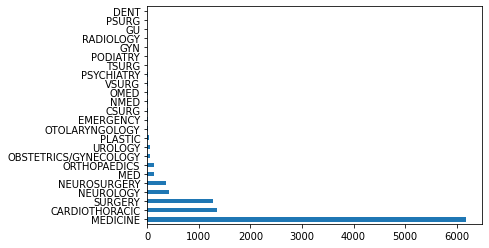

In [0]:
Counts = Service_Brief_Hospital_Course['Service'].value_counts().plot(kind='barh')

In [0]:
Service_Brief_Hospital_Course_Top5 = Service_Brief_Hospital_Course.query('Service == "MEDICINE" | Service == "CARDIOTHORACIC" | Service == "SURGERY" | Service == "NEUROLOGY" | Service == "NEUROSURGERY"')
Service_Brief_Hospital_Course_Top5

,Service,Brief Hospital Course
0,MEDICINE,"87 yo F with h/o CHF, COPD on 5 L oxygen at ba..."
1,MEDICINE,Mr. [**Known lastname 1829**] was seen at [**H...
2,NEUROSURGERY,Patient presented electively for meningioma re...
3,MEDICINE,"82 yo F with CAD, CHF, HTN, recent PE ([**10-1..."
4,NEUROSURGERY,Patient presented electively on [**2-25**] for...
...,...,...
10254,MEDICINE,The patient was admitted to the orthopaedic su...
10255,MEDICINE,Mrs. [**Known lastname 51216**] was admitted f...
10256,MEDICINE,Patient was admitted to the ICU/neurosurgery s...
10257,MEDICINE,Neuro - Initially admitted to the [**Hospital ...


In [0]:
Service_Brief_Hospital_Course_Top5.to_csv('Service_Brief_Hospital_Course_Top5.csv') 
files.download('Service_Brief_Hospital_Course_Top5.csv')